In [1]:
!pip install gymnasium[atari]==1.0
!pip install ale_py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.7 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import ale_py

env = gym.make("ALE/Freeway-v5", difficulty = 0, mode = 1, obs_type = "rgb", render_mode = "rgb_array")

print(f"Action space is {env.action_space}") # NOOP, UP, DOWN
print(f"Observation space is {env.observation_space}") # Image of 210 x 160 px

Action space is Discrete(3)
Observation space is Box(0, 255, (210, 160, 3), uint8)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
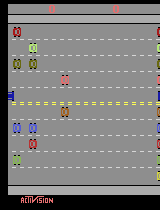

In [3]:
env.reset()
env.render()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
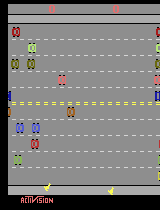

In [4]:
array, _, _, _, _ = env.step(1)
array

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
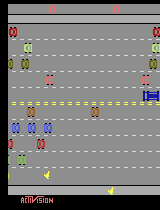

In [5]:
env.step(1)
env.step(1)
env.step(1)
array = env.render()
array

In [6]:
import numpy as np
np.save("freeway.npy", array)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# array = np.load("ss-freeway.npy")

roads = [183, 167, 151, 135, 119, 103, 87, 71, 55, 39, 23]

In [15]:
cars_bottom = np.array(roads[:-1])-4
cars_top = np.array(roads[1:])+5

In [ ]:

plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].imshow(array)
axs[0].set_title('Original Image')
axs[0].axis('off')

array_with_roads = array.copy()
array_with_roads[roads, :] = (255, 0, 0)
array_with_roads[cars_bottom, :] = (0, 0, 255)
array_with_roads[cars_top, :] = (0, 0, 255)
axs[1].imshow(array_with_roads)
axs[1].set_title('Roads Detected')
axs[1].axis('off')

for bottom, top in zip(cars_bottom, cars_top):
    array_with_roads[top:bottom, :] = (0, 0, 255)
    axs[1].text(array_with_roads.shape[1] // 2, top+5, f'Road {roads.index(bottom + 4)}', color='white', fontsize=12, ha='center')

axs[1].imshow(array_with_roads)

In [ ]:
for i in range(0, len(roads)-1):
    detected_car = array[cars_top[i]:cars_bottom[i]+1, :, :]
    plt.imshow(detected_car)
    plt.title('Detected Car')
    plt.show()

In [ ]:
#getting the first road
detected_car = array[cars_top[0]:cars_bottom[0]+1, :, :].copy()

color_road = [142, 142, 142]
bbox = np.all(detected_car == color_road, axis=2)

pattern2search = np.array([True, False, False, False, False, False, False, True])
found = np.all(bbox == pattern2search.reshape(-1, 1), axis=0)
slided_found = np.concatenate([[False], found[:-1]])
print(slided_found.shape)
# slided_found = bbox and slided_found

all_road = np.all(bbox, axis=0)
slided_found = np.logical_and(all_road, slided_found)
slided_found = np.concatenate([slided_found[1:], [False]])

# cars_and_direction = found + slided_found
cars_and_direction = found.astype(int) + slided_found.astype(int)
# if 1 then car is going left, if 2 then car is going right, if 0 then there is no car

# visualizing the detected car
detected_car = detected_car.copy()
detected_car[:, cars_and_direction == 1] = [255, 0, 0]
detected_car[:, cars_and_direction == 2] = [0, 255, 0]
plt.imshow(detected_car)
plt.title('Detected Car')
plt.show()

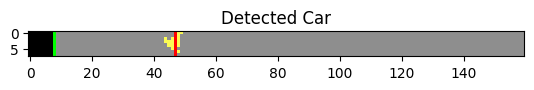

In [55]:
def detect_cars_and_directions(array, cars_top, cars_bottom, index):
    detected_car = array[cars_top[index]:cars_bottom[index]+1, :, :].copy()

    # Define the road color
    color_road = [142, 142, 142]

    # Create a boolean mask for pixels matching the road color
    bbox = np.all(detected_car == color_road, axis=2)  # Shape: (H, 160)

    # Define the pattern to search
    pattern2search = np.array([True, False, False, False, False, False, False, True])

    # Find columns where the pattern matches
    found = np.all(bbox == pattern2search.reshape(-1, 1), axis=0)

    # Slide the found pattern to check for the reverse direction
    slided_found = np.concatenate([[False], found[:-1]])

    # Combine the mask with the road alignment
    all_road = np.all(bbox, axis=0)
    slided_found = np.logical_and(all_road, slided_found)
    slided_found = np.concatenate([slided_found[1:], [False]])

    # Determine car direction:
    # - 1 indicates car moving left, 2 indicates car moving right
    cars_and_direction = found.astype(int) + slided_found.astype(int)

    return cars_and_direction

index = 0  # Analyzing the first car region
result = detect_cars_and_directions(array, cars_top, cars_bottom, index)

# Visualizing the detected car directions
detected_car = array[cars_top[index]:cars_bottom[index] + 1, :, :].copy()
detected_car[:, result == 1] = [255, 0, 0]  # Red for left
detected_car[:, result == 2] = [0, 255, 0]  # Green for right

plt.imshow(detected_car)
plt.title('Detected Car')
plt.show()

In [83]:
def find_bunny(array_with_roads, final_array, roads):
    yellow = [252, 252, 84]
    y_bunny = np.any(np.all(array_with_roads == yellow, axis=2), axis=1)

    # Create a boolean mask for pixels matching the road color
    bbox = np.all(array_with_roads == yellow, axis=2)  # Shape: (H, 160)

    # Define the pattern to search
    # pattern2search = np.array([True, False, True, True, True])

    # print(y_bunny)
    bunny_road = None
    for i in range(len(roads) - 1):
        if np.any(y_bunny[roads[i+1]:roads[i] + 1]):
            print(i, y_bunny[roads[i+1]:roads[i] + 1])
            bunny_road = i
            break

    slided_bbox = np.concatenate([bbox[1:, :], np.zeros((1, bbox.shape[1]), dtype=bool)])
    slided_bbox = np.logical_and(bbox, slided_bbox)
    x_bunny = np.any(slided_bbox, axis=0)

    if bunny_road is not None:
        final_array[bunny_road-1, x_bunny] = 3
    #     print('bunny is on:', bunny_road, np.where(x_bunny))
    # else:
    #     print('bunny not found')

In [81]:
def frame2state(final_array):
    state = []
    # print(final_array)
    y, x = np.where(final_array == 3)
    print(x, y)
    state.append(int(x[0]))
    state.append(int(y[0]))

    current_road = y[0]
    x = np.where(final_array[current_road].reshape(-1) == 1)[0]
    if len(x) == 0:
        x = [-1]
    state.append(int(x[0]))
    state.append(1)

    x = np.where(final_array[current_road].reshape(-1) == 2)[0]
    if len(x) == 0:
        x = [-1]
    state.append(int(x[0]))
    state.append(2)

    # print(current_road)
    next_road = current_road - 1
    x = np.where(final_array[next_road].reshape(-1) == 1)[0]
    if len(x) == 0:
        x = [-1]
    state.append(int(x[0]))
    state.append(1)

    x = np.where(final_array[next_road].reshape(-1) == 2)[0]
    if len(x) == 0:
        x = [-1]
    state.append(int(x[0]))
    state.append(2)

    return state, current_road

In [ ]:
array_with_roads = array.copy()

final_array = np.zeros((len(roads)+1, array.shape[1]), dtype=int)
for road in range(len(roads)-1):
    result = detect_cars_and_directions(array, cars_top, cars_bottom, road)

    array_with_roads[cars_top[road]:cars_bottom[road] + 1, result == 1] = [0, 0, 255]  # Red for left
    array_with_roads[cars_top[road]:cars_bottom[road] + 1, result == 2] = [0, 255, 0]  # Green for right
    final_array[road+1] = result

find_bunny(array_with_roads, final_array, roads)

plt.imshow(array_with_roads)
plt.show()

plt.imshow(final_array[::-1, :])
plt.show()

frame2state(final_array)

In [ ]:
state, _ = env.reset()
plt.imshow(state)
plt.show()

In [79]:
def process_frame(array, roads, cars_top, cars_bottom, seen_roads):
    final_array = np.zeros((len(roads)-1, array.shape[1]), dtype=int)
    for road in range(len(roads)-1):
        result = detect_cars_and_directions(array, cars_top, cars_bottom, road)
        final_array[(len(roads)-2)-road] = result

    find_bunny(array, final_array, roads)

    # plt.imshow(final_array[::-1, :]
    # plt.imshow(final_array[::-1, :])
    # plt.show()

    state, current_road = frame2state(final_array)
    print(current_road)
    reward = 0
    if seen_roads[current_road] == 0:
        seen_roads[current_road] = 1
        reward = 1
    return state, reward

In [26]:
env.reset()
env.step(1)
env.render()
print()

In [63]:
import numpy as np
from collections import defaultdict
import sys
from tqdm import tqdm

def make_epsilon_greedy_policy(Q, epsilon, num_Actions):
    """
    Creates an epsilon-greedy policy based on a Q and epsilon action value function

    Args:
         Q: A dictionary whose correspondence is state -> action-values.
            Each value is a numpy array of length num_Actions (see below)
         epsilon: The probability of selecting a random action (float between 0 and 1).
         num_Actions: Number of actions in the environment. (in the case of WIndyGridWorld it is 4)

    Returns:
         A function that takes the observation as an argument and returns as a result
         the probabilities of each action as a numpy array of length num_Actions.
    """
    def policy_fn(observation):
        observation = tuple(observation)
        A = np.ones(num_Actions, dtype=float) * epsilon / num_Actions
        # print(observation, Q.keys())
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)

        return A

    return policy_fn


def mc_control_on_policy_epsilon_greedy(env, num_episodes, discount=1.0, epsilon=0.1, epsilon_decay=0.9):
    """
    Control by Monte Carlo methods using Epsilon-Greedy policies
    Find an epsilon-greedy policy.

    Args:
         env: Gymnasium environment.
         num_episodes: Number of episodes in the sample.
         discount: discount factor.
         epsilon: The probability of selecting a random action (float between 0 and 1)

    Returns:
         A tuple (Q, policy).
         Q: A dictionary whose correspondence is state -> action-values.
         policy: A function that takes the observation as an argument and returns as a result
                 the probabilities of each action
    """

    # We store the sum and number of returns for each state to calculate the average.
    # We could use an array to store all the returns, but it is inefficient in terms of memory.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)

    # The Q action value function.
    # A nested dictionary whose correspondence is state -> (action -> action-value).
    # Initially we initialize it to zero
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Rewards
    y = np.zeros(num_episodes, dtype=np.float16)

    for i_episode in tqdm(range(num_episodes)):
        seen_roads = np.zeros((len(roads)-1))
        # The policy we are following
        policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

        # We update epsilon
        epsilon = max(epsilon * epsilon_decay, 0.01)

        # We generate an episode and store it
        # An episode is an array of tuples (state, action, reward)
        episode = []
        state, _ = env.reset()
        state, _, _, _, _ = env.step(1)
        screen = env.render()
        plt.imshow(screen)
        plt.show()
        state, reward = process_frame(state, roads, cars_top, cars_bottom, seen_roads)
        # print(state)
        done = False
        total_reward = 0
        while not done:
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, terminated, truncated, _ = env.step(action)
            screen = env.render()
            plt.imshow(screen)
            plt.show()
            next_state, additional_reward = process_frame(next_state, roads, cars_top, cars_bottom, seen_roads)
            print(next_state, reward, seen_roads)
            done = terminated or truncated
            episode.append((tuple(state), action, reward))
            total_reward += reward + additional_reward
            if done:
                break
            state = next_state

        print("Episode finished after {} timesteps and reward was {} ".format(len(episode), total_reward))

        y[i_episode] = total_reward
        idx = 0

        # We visited all the states of the episode
        G = 0
        for i in range(len(episode)-1, -1, -1):
            x = episode[i]
            state = x[0]
            action = x[1]
            reward = x[2]
            sa_pair = (state, action)
            # We calculate the return of each state
            G = reward + discount * G
            # We calculate the average return for this state across all sampled episodes.
            # print(sa_pair, G)
            returns_sum[sa_pair] += G
            returns_count[sa_pair] += 1.0
            Q[state][action] = returns_sum[sa_pair] / returns_count[sa_pair]
            idx = idx + 1

        # write to summary
        # writer.add_scalar("reward", total_reward, i_episode)

        # We print which episode we are in, useful for debugging.
        if i_episode % 100 == 0 and i_episode > 0:
            print("\rEpisode {:8d}/{:8d} - Average reward {:.2f}".format(i_episode, num_episodes, np.average(y[(i_episode-100):i_episode])), end="")
            sys.stdout.flush()

        # The policy is implicitly improved by changing the values of Q

    return Q, policy

  0%|          | 0/100 [00:00<?, ?it/s]

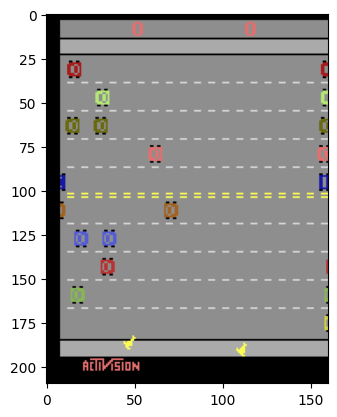

0 [False False False False False False False False False False False False
 False False False False  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9


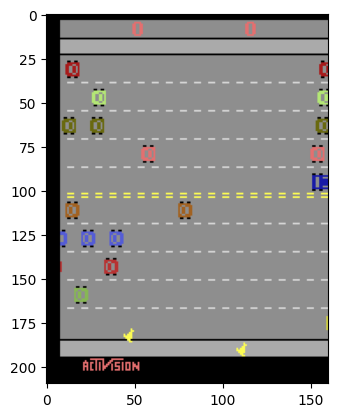

0 [False False False False False False False False False False False False
  True  True  True  True  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, -1, 2, -1, 1, 23, 2] 0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


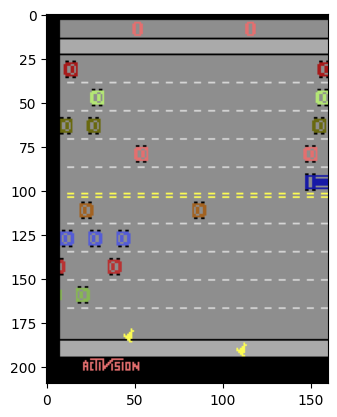

0 [False False False False False False False False False False False False
  True  True  True  True  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, -1, 2, -1, 1, 8, 2] 0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


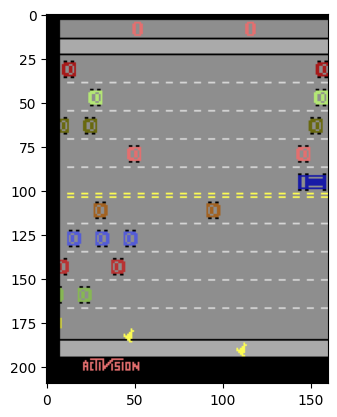

0 [False False False False False False False False False False False False
  True  True  True  True  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 8, 2, -1, 1, 9, 2] 0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


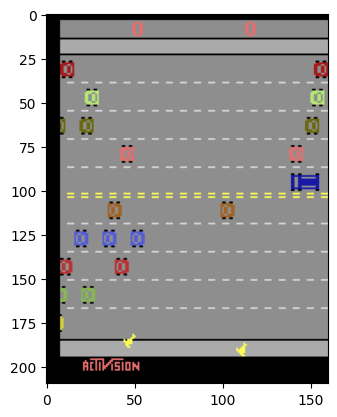

0 [False False False False False False False False False False False False
 False False False  True  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 9, 2, -1, 1, 11, 2] 0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


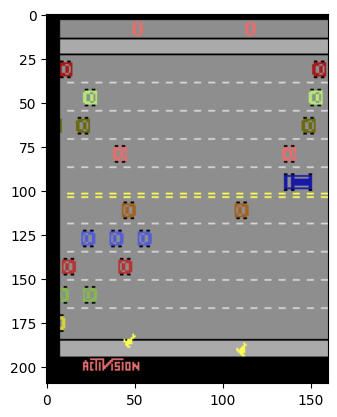

0 [False False False False False False False False False False False False
 False False False  True  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 10, 2, -1, 1, 12, 2] 0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


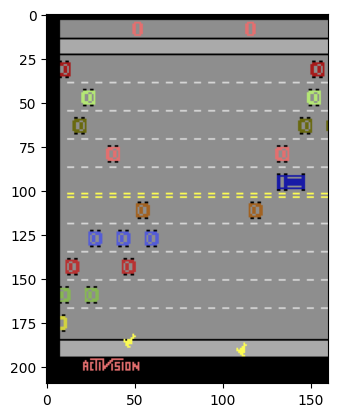

0 [False False False False False False False False False False False False
 False False False  True  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 11, 2, -1, 1, 13, 2] 0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


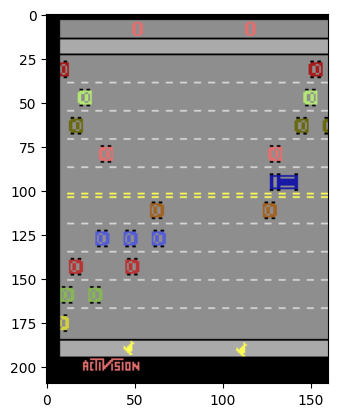

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 30, 1, -1, 2, 13, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


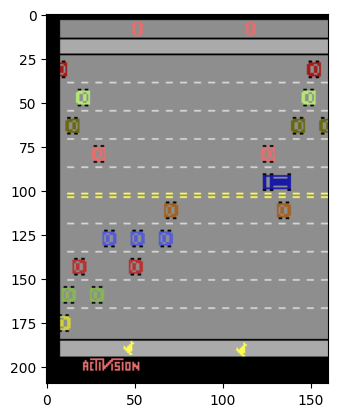

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 26, 1, -1, 2, 11, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


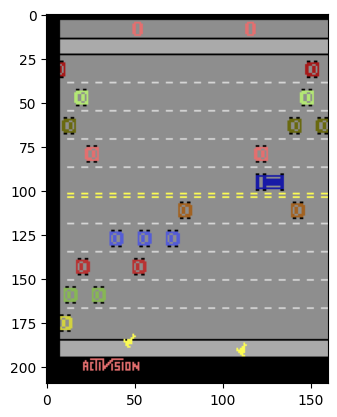

0 [False False False False False False False False False False False False
 False False False  True  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 14, 2, -1, 1, 17, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


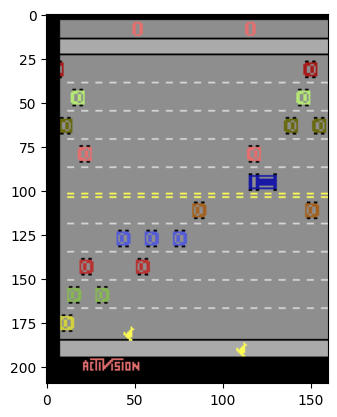

0 [False False False False False False False False False False False  True
  True  True  True  True  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 15, 2, -1, 1, 19, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


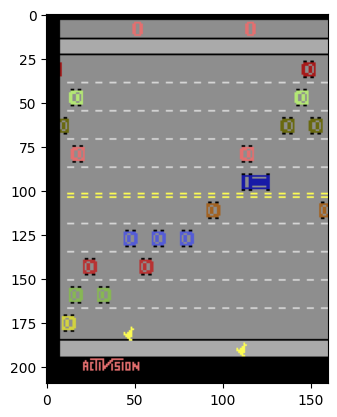

0 [False False False False False False False False False False False  True
  True  True  True  True  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 16, 2, -1, 1, 20, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


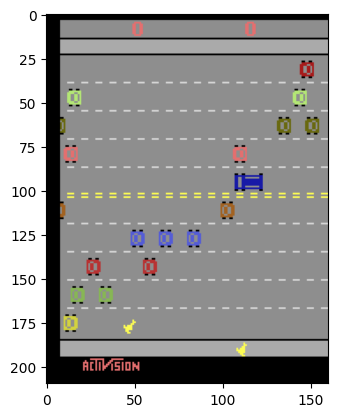

0 [False False False False False False False  True  True  True  True  True
  True  True  True False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 17, 2, -1, 1, 21, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


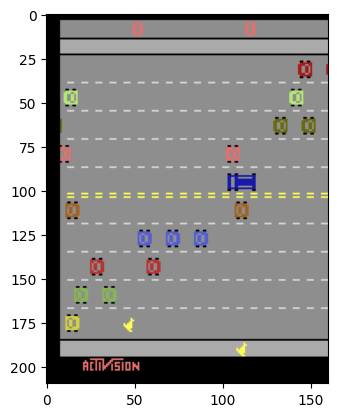

0 [False False False False False False  True  True  True  True  True  True
  True  True False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 18, 2, -1, 1, 23, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


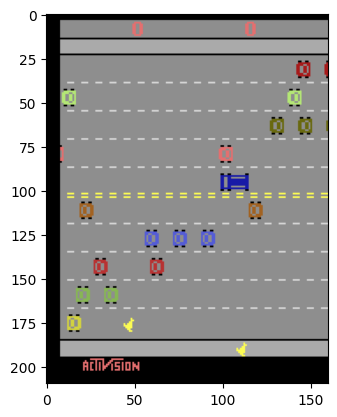

0 [False False False False False False  True  True  True  True  True  True
  True  True False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 19, 2, -1, 1, 24, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


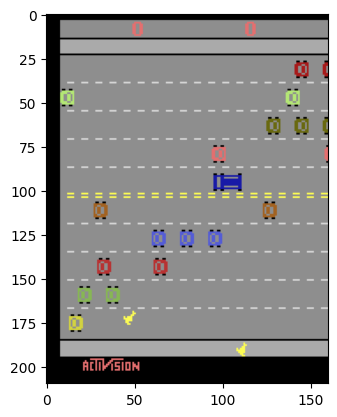

0 [False False  True  True  True  True  True  True  True  True False False
 False False False False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 20, 2, -1, 1, 25, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


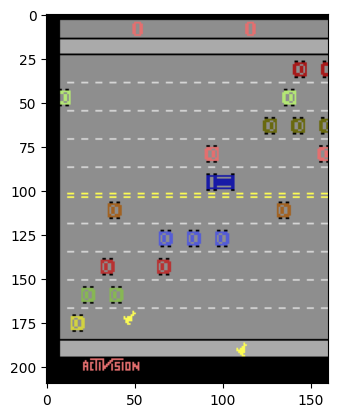

0 [False False  True  True  True  True  True  True  True  True False False
 False False False False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 21, 2, -1, 1, 27, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


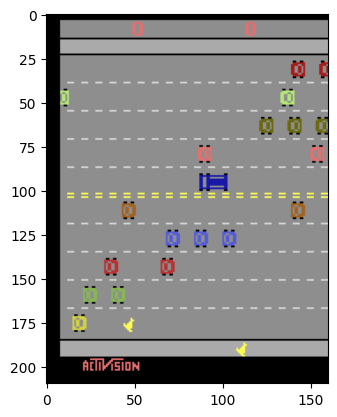

0 [False False False False False False  True  True  True  True  True  True
  True  True False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 22, 2, -1, 1, 28, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


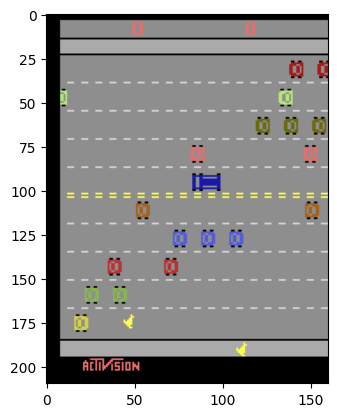

0 [False False False False  True  True  True  True  True  True  True  True
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 23, 2, -1, 1, 29, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


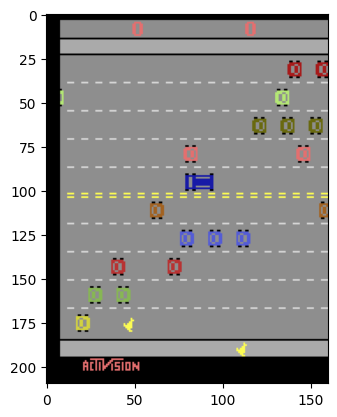

0 [False False False False False False  True  True  True  True  True  True
  True  True False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 24, 2, -1, 1, 31, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


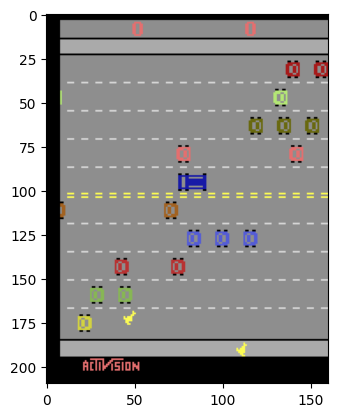

0 [False False  True  True  True  True  True  True  True  True False False
 False False False False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 25, 2, -1, 1, 32, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


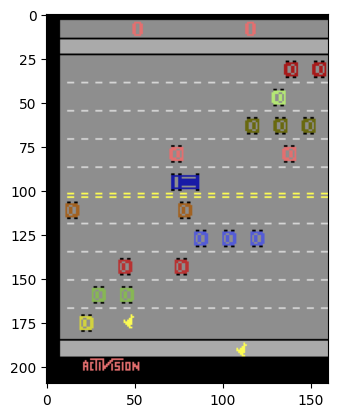

0 [False False False False  True  True  True  True  True  True  True  True
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 26, 2, -1, 1, 33, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


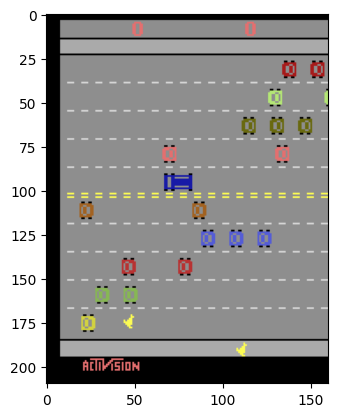

0 [False False False False  True  True  True  True  True  True  True  True
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 27, 2, -1, 1, 35, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


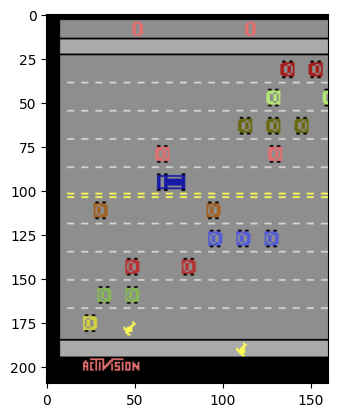

0 [False False False False False False False False  True  True  True  True
  True  True  True  True False]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 28, 2, -1, 1, 36, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


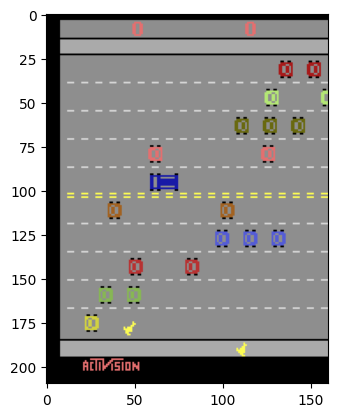

0 [False False False False False False False False  True  True  True  True
  True  True  True  True False]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 29, 2, -1, 1, 37, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


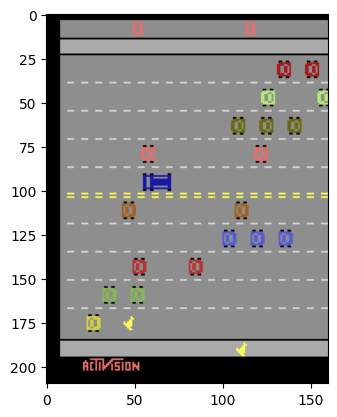

0 [False False False False False  True  True  True  True  True  True  True
  True False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 30, 2, -1, 1, 39, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


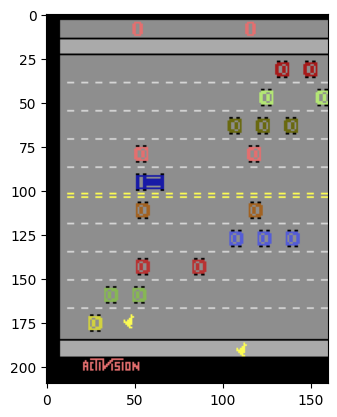

0 [False False False False  True  True  True  True  True  True  True  True
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 31, 2, -1, 1, 40, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


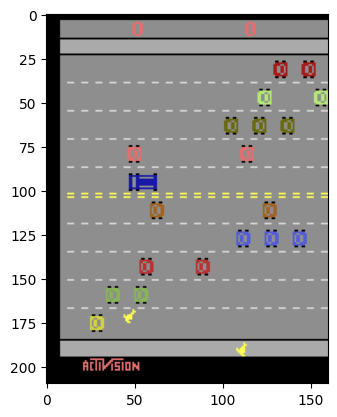

0 [False  True  True  True  True  True  True  True  True False False False
 False False False False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 32, 2, -1, 1, 41, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


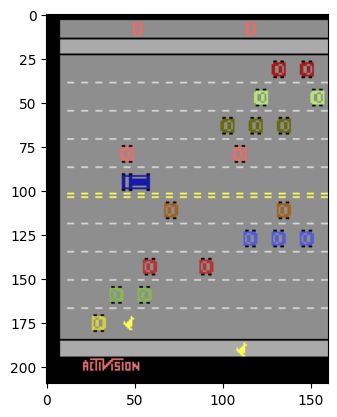

0 [False False False False False  True  True  True  True  True  True  True
  True False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 33, 2, -1, 1, 43, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


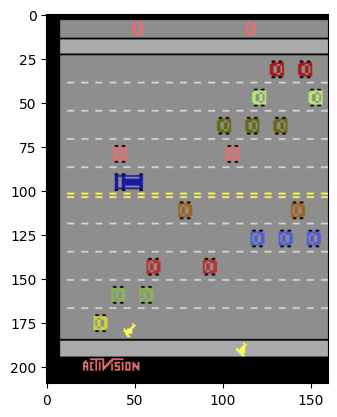

0 [False False False False False False False False False  True  True  True
  True  True  True  True  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 34, 2, -1, 1, 44, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


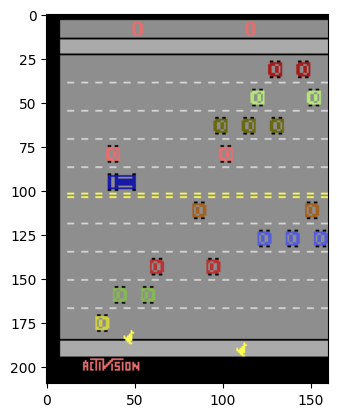

0 [False False False False False False False False False False False False
 False  True  True  True  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 35, 2, -1, 1, 45, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


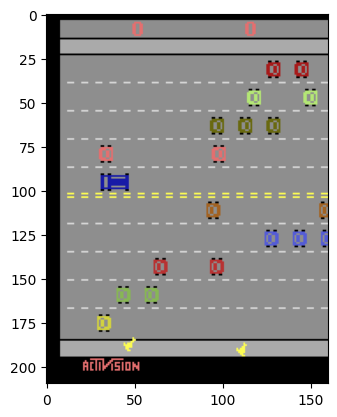

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 30, 1, -1, 2, 93, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


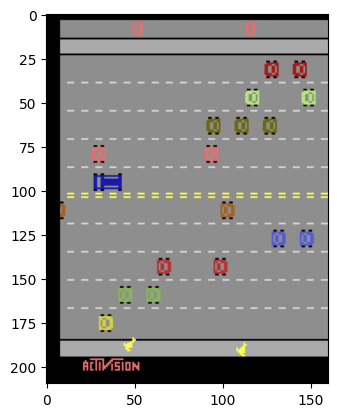

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 26, 1, -1, 2, 91, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


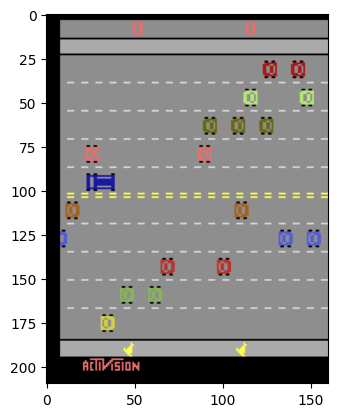

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 22, 1, -1, 2, 89, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


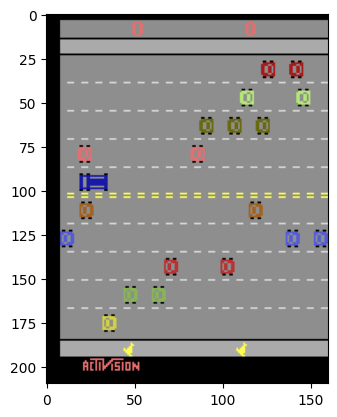

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 18, 1, -1, 2, 87, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


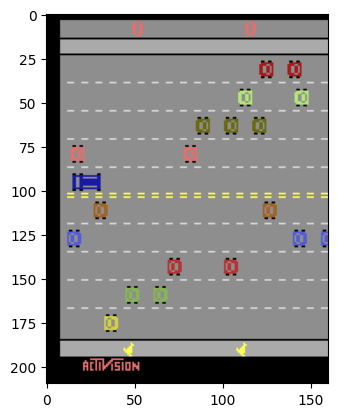

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 14, 1, -1, 2, 85, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


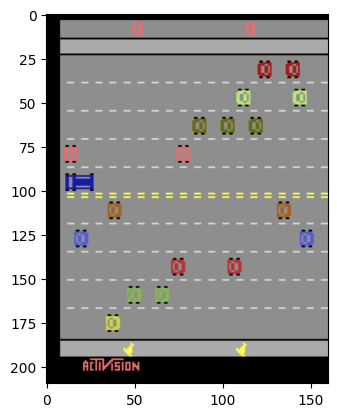

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 10, 1, -1, 2, 83, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


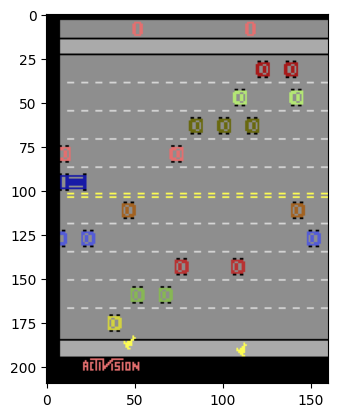

0 [False False False False False False False False False False False False
 False False False False  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 42, 2, -1, 1, 55, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


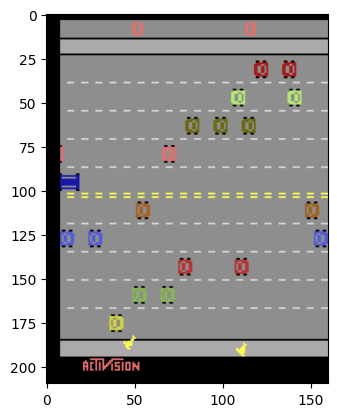

0 [False False False False False False False False False False False False
 False False False False  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 43, 2, -1, 1, 56, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


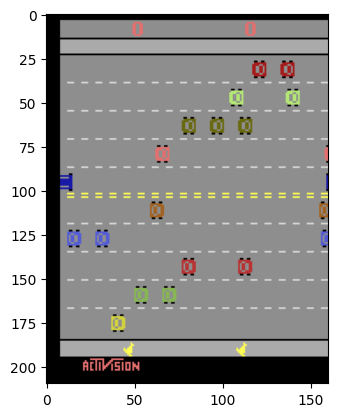

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 62, 1, -1, 2, 77, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


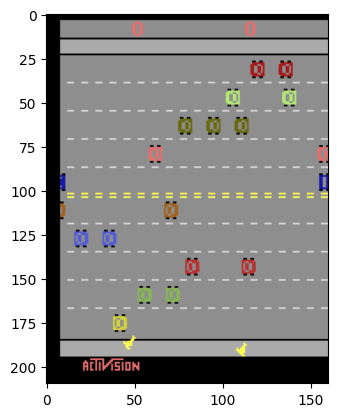

0 [False False False False False False False False False False False False
 False False False False  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, -1, 2, -1, 1, 59, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


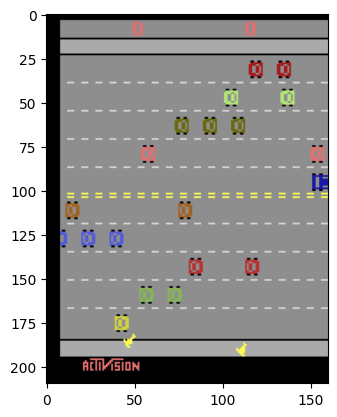

0 [False False False False False False False False False False False False
 False False False  True  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, -1, 2, -1, 1, 60, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


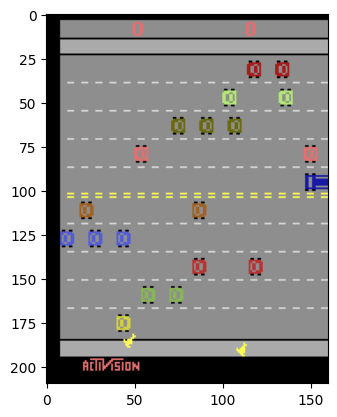

0 [False False False False False False False False False False False False
 False False False  True  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, -1, 2, -1, 1, 61, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


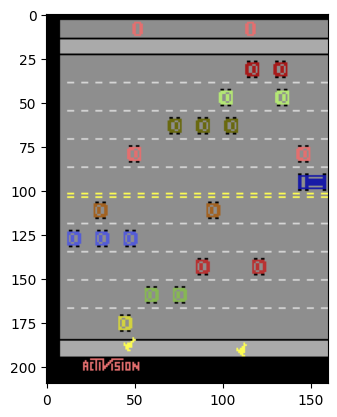

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 142, 1, -1, 2, 69, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


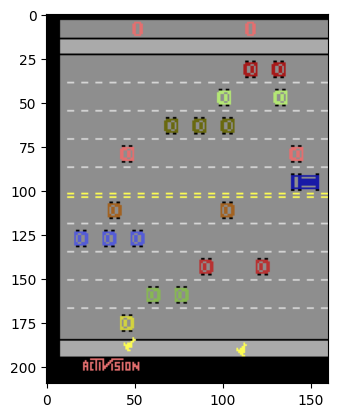

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 42, 1, -1, 2, 67, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


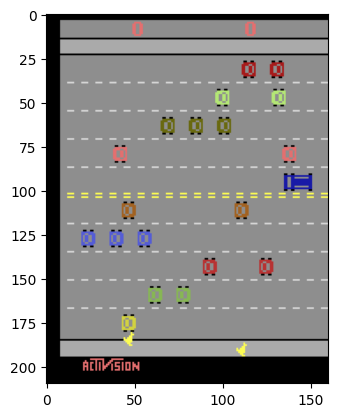

0 [False False False False False False False False False False False False
 False False  True  True  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 50, 2, -1, 1, 65, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


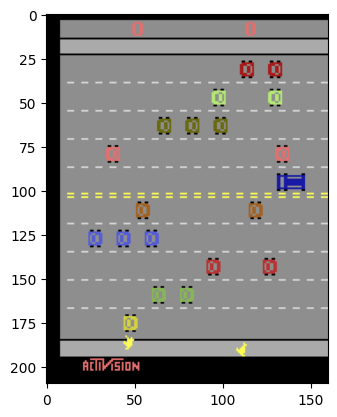

0 [False False False False False False False False False False False False
 False False False False  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 51, 2, -1, 1, 67, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


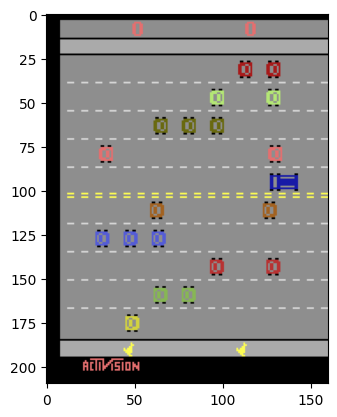

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 30, 1, -1, 2, 61, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


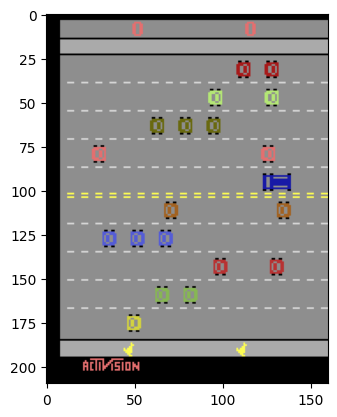

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 26, 1, -1, 2, 59, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


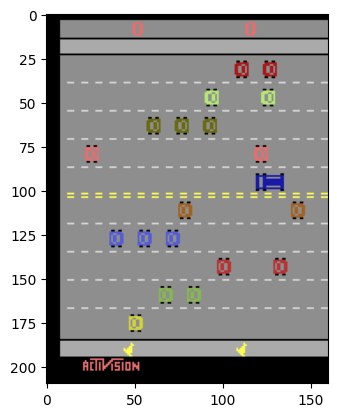

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 22, 1, -1, 2, 57, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


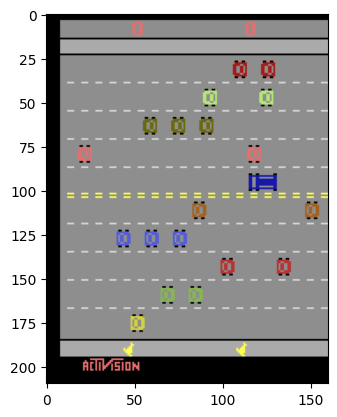

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 18, 1, -1, 2, 55, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


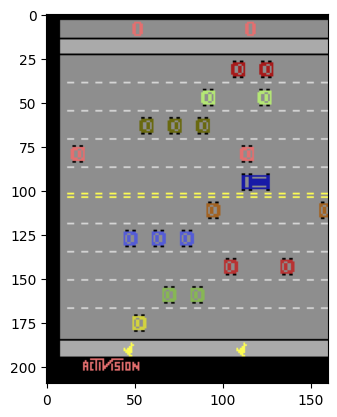

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 14, 1, -1, 2, 53, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


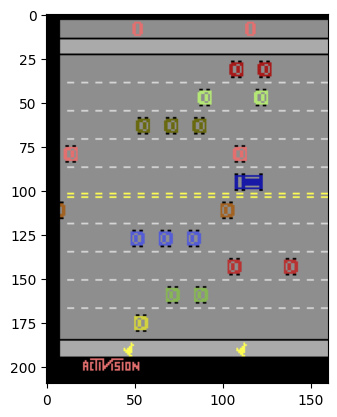

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 10, 1, -1, 2, 51, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


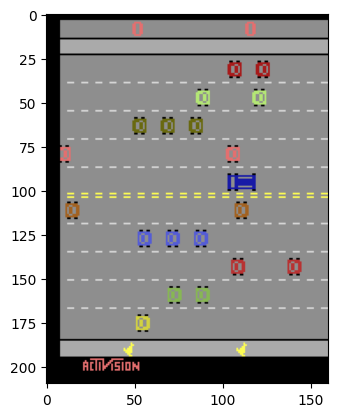

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 102, 1, -1, 2, 49, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


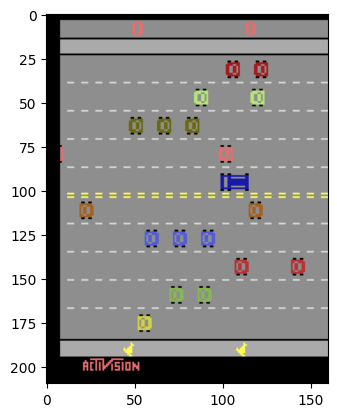

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 98, 1, -1, 2, 47, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


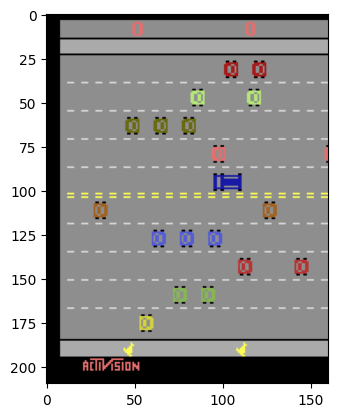

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 94, 1, -1, 2, 45, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


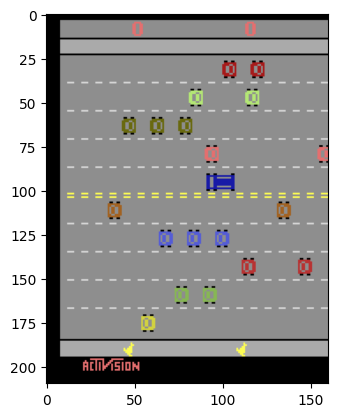

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 90, 1, -1, 2, 43, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


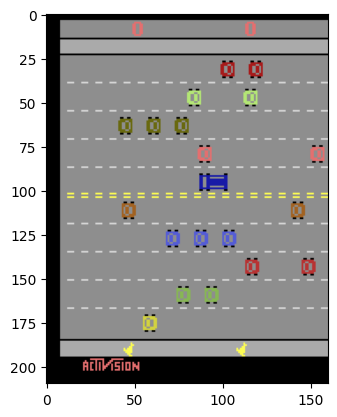

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 86, 1, -1, 2, 41, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


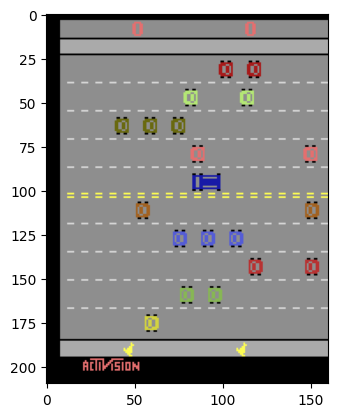

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 82, 1, -1, 2, 39, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


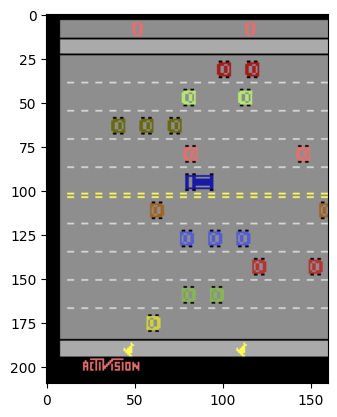

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 78, 1, -1, 2, 37, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


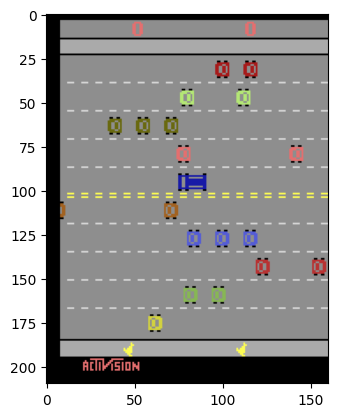

4 [False  True False False False False False False False False False False
 False False False False False]
[ 44  45  46  47  48 108 109 110 111 112] [3 3 3 3 3 3 3 3 3 3]
3
[44, 3, 74, 1, -1, 2, 35, 1, -1, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


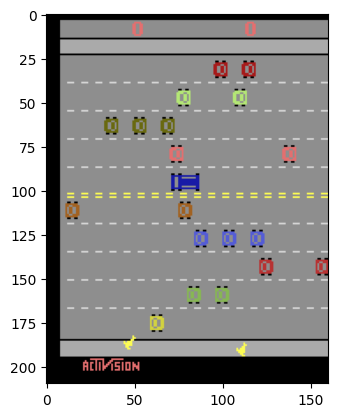

0 [False False False False False False False False False False False False
 False False False False  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 66, 2, -1, 1, 87, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


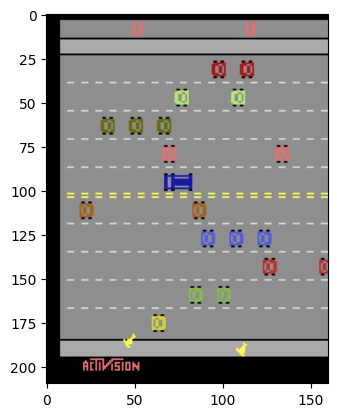

0 [False False False False False False False False False False False False
 False False False  True  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 67, 2, -1, 1, 88, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


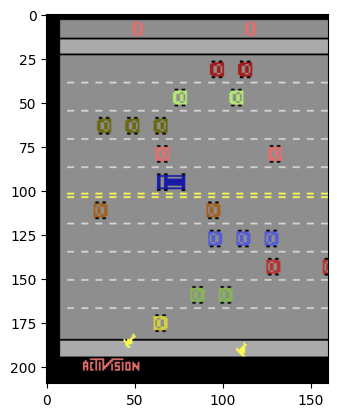

0 [False False False False False False False False False False False False
 False False False  True  True]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 68, 2, -1, 1, 89, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


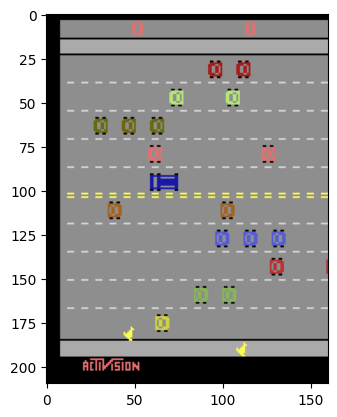

0 [False False False False False False False False False False False  True
  True  True  True  True  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 69, 2, -1, 1, 91, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


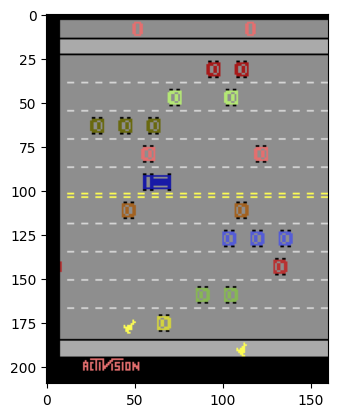

0 [False False False False False False False  True  True  True  True  True
  True  True  True False False]
[ 44  45  46  47  48  49 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 70, 2, -1, 1, 92, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


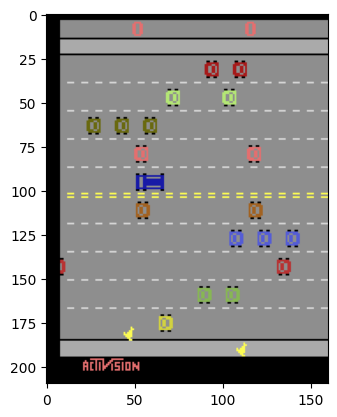

0 [False False False False False False False False False False False  True
  True  True  True  True  True]
[ 44  45  46  47  48 108 109 110 111 112] [9 9 9 9 9 9 9 9 9 9]
9
[44, 9, -1, 1, 71, 2, -1, 1, 93, 2] 0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


  0%|          | 0/100 [00:14<?, ?it/s]


KeyboardInterrupt: 

In [85]:
# Execute
Q, policy = mc_control_on_policy_epsilon_greedy(env, num_episodes=100, discount=1, epsilon=1, epsilon_decay=0.999)

In [ ]:
def execute_episode_MC(policy, env):
    obs, _ = env.reset()
    obs, reward, done, _, info = env.step(1)
    env.render()
    obs = process_frame(obs, roads, cars_top, cars_bottom)
    t, total_reward, done = 0, 0, False
    # print("Obs inicial: {} ".format(obs))

    switch_action = {
            0: "Noop",
            1: "Up",
            2: "Down"
        }

    for t in range(1000): # We limit the number of time-steps in each episode to 1000
        # We choose the optimal policy in each case (the maximum of the Epsilon-Greedy policy)
        arr = np.array(policy(obs))
        action = arr.argmax()

        # We execute the action and wait for the response from the environment
        new_obs, reward, done, _, info = env.step(action)
        env.render()
        new_obs = process_frame(new_obs, roads, cars_top, cars_bottom)
        print(action, reward)
        # print("{} - {} --> {} and reward: {}".format(obs, switch_action[action], new_obs, reward))
        obs = new_obs

        if t==999:
            print("Number of time-septs exceeds 1000. STOP episode.")

        total_reward += reward
        t += 1
        if done:
            break

    print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
    env.close()

In [ ]:
execute_episode_MC(policy, env)